In [69]:
import numpy as np
import pandas as pd

from skimage import io
from skimage.transform import resize
from skimage.color import rgb2gray

from sklearn import svm
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import os 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import cv2
import math 

import pickle 

from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

In [39]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [40]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = resize(io.imread(os.path.join(folder,filename)),(64,64),anti_aliasing=True,preserve_range=True)
        if img is not None:
            images.append(img)
    return np.array(images)

In [41]:
path = 'content/drive/MyDrive/segmentation_WBC/SVM_Segmentation/'

outerCells  = load_images_from_folder('/content/drive/MyDrive/New folder/outer_cell')
innerCells  = load_images_from_folder('/content/drive/MyDrive/New folder/inner_cell')
backgrounds = load_images_from_folder('/content/drive/MyDrive/New folder/background')

In [42]:
x_train = []

for j in range(len(outerCells)):
    x_train.append(outerCells[j])
    x_train.append(innerCells[j])
    x_train.append(backgrounds[j])

x_train = np.array(x_train)


In [43]:
feature_vectors = []
for i in x_train:
    feature_vectors.append(np.float32(i)/255)

feature_vectors = np.array(feature_vectors)

In [44]:
data = pd.DataFrame(columns=['R','G','B','class'])
for i in range(len(x_train)):
    if (i) % 3 == 0:
        data = data.append(pd.DataFrame(np.insert(feature_vectors[i].reshape(-1,3),3,1,axis=1),columns=['R','G','B','class']))
    if (i) % 3 == 1:
        data = data.append(pd.DataFrame(np.insert(feature_vectors[i].reshape(-1,3),3,2,axis=1),columns=['R','G','B','class']))
    if (i) % 3 == 2:
        data = data.append(pd.DataFrame(np.insert(feature_vectors[i].reshape(-1,3),3,3,axis=1),columns=['R','G','B','class']))
data = data.reset_index()
data = data.drop(['index'],axis=1)

In [45]:
y = data['class'].values
x = data.iloc[:,[0,1,2]].values

In [46]:
# parameter = [
#     {'C':[1,10,100,1000],'kernel':['linear']},
# ]
# clf = GridSearchCV(estimator = svm.SVC(), param_grid = parameter ,n_jobs = -1)

# clf.fit(x,y)

# print("best score is ", clf.best_score_)
# print('best "c" is ', clf.best_estimator_.C)
# print('best kernel is ',clf.best_estimator_.kernel)
# print('best gamma is ',clf.best_estimator_.gamma)

clf = svm.SVC(C=100,kernel='linear',gamma="scale")
clf.fit(x,y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
#with open('SVM_Model_Pickle','wb') as f:
    #pickle.dump(clf,f)

In [71]:
imagePathDataset2 = '/content/drive/MyDrive/segmentation_WBC/Dataset 2/'
imagePathDataset1 = '/content/drive/MyDrive/segmentation_WBC/Dataset 1/'
x_test = io.imread('/content/drive/MyDrive/segmentation_WBC/Dataset 1/025.bmp')
pixel_values = np.float32(x_test)/255
x_test = np.array(pixel_values)

testclass = pd.DataFrame(columns = ['R','G','B'])
testclass = testclass.append(pd.DataFrame(x_test.reshape(-1,3),columns = ['R','G','B']))

x_test = testclass.iloc[:,:].values

y_pred = clf.predict(x_test)

In [72]:
cluster_mean  = []
cluster_mean2 = []
cluster_mean3 = []

for i in range(len(x_test)):
  if y_pred[i] == 1:
    cluster_mean.append(x_test[i])
  if y_pred[i] == 2:
    cluster_mean2.append(x_test[i])
  if y_pred[i] == 3:
    cluster_mean3.append(x_test[i])
  
cluster_mean = np.mean(cluster_mean,axis=0)
cluster_mean2 = np.mean(cluster_mean2,axis=0)
cluster_mean3 = np.mean(cluster_mean3,axis=0)




In [73]:
y_pred.reshape(-1,1)
y_mean = []
for i in y_pred:
    if i == 1:
        y_mean.append(cluster_mean)
    if i == 2:
        y_mean.append(cluster_mean2)
    if i == 3:
        y_mean.append(cluster_mean3)
        
y_mean = np.array(y_mean)

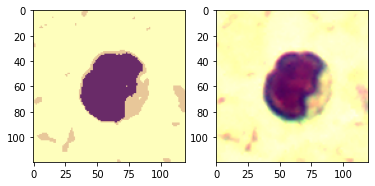

In [74]:
# np.unique(y_pred,return_counts=True)
reshape_vale=int(math.sqrt(y_pred.shape[0]))

y_mean = y_mean.reshape(reshape_vale,reshape_vale,3)

plt.subplot(1,2,1)
plt.imshow(y_mean)

plt.subplot(1,2,2)
plt.imshow(io.imread('/content/drive/MyDrive/segmentation_WBC/Dataset 1/025.bmp'))


In [3]:
0%10 

0